In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,BatchNormalization,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using ImageDataGenerator class to preprocess data from directory
Standard images' pixels from 0 to 1. Split flowers dataset into train set and validation set.

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split = 0.3,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'flowers',
        target_size=(230, 230),
        batch_size=256,
        class_mode='categorical',
        subset='training')

valid_generator = train_datagen.flow_from_directory(
        'flowers', 
        target_size=(230, 230),
        batch_size=256,
        class_mode='categorical',
        subset='validation') 

Found 3028 images belonging to 5 classes.
Found 1295 images belonging to 5 classes.


Just build a CNN consisting of a convolutional layer, a pooling layer, and a batch normalization layer, and finally use Faltten to flatten the tensor in Latent Space, and finally use Softmax to predict the result.

In [4]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(230,230,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 228, 228, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 114, 114, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 114, 114, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 32)        1

Final step is to complie and fit model.

In [6]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [7]:
history = model.fit_generator(train_generator, epochs=50, verbose=1, callbacks=None,validation_data=valid_generator)

D:\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
12/12 [==============================] - 38s 3s/step - loss: 1.5295 - accuracy: 0.4581 - val_loss: 1.5629 - val_accuracy: 0.2880
Epoch 2/50
12/12 [==============================] - 33s 3s/step - loss: 1.0524 - accuracy: 0.6110 - val_loss: 1.6227 - val_accuracy: 0.2440
Epoch 3/50
12/12 [==============================] - 33s 3s/step - loss: 0.8896 - accuracy: 0.6674 - val_loss: 1.8059 - val_accuracy: 0.2432
Epoch 4/50
12/12 [==============================] - 33s 3s/step - loss: 0.7653 - accuracy: 0.7147 - val_loss: 1.8128 - val_accuracy: 0.2432
Epoch 5/50
12/12 [==============================] - 33s 3s/step - loss: 0.6938 - accuracy: 0.7384 - val_loss: 2.1960 - val_accuracy: 0.2432
Epoch 6/50
12/12 [==============================] - 33s 3s/step - loss: 0.6109 - accuracy: 0.7734 - val_loss: 2.3769 - val_accuracy: 0.2432
Epoch 7/50
12/12 [==============================] - 33s 3s/step - loss: 0.5512 - accuracy: 0.8025 - val_loss: 2.4387 - val_accuracy: 0.2432
Epoch 8/50
12/12 [==

In [8]:
model.save('flowers_classification.h5')

Using plt to visualize model's training process. And find model just overfitting.

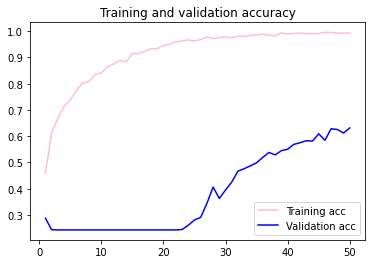

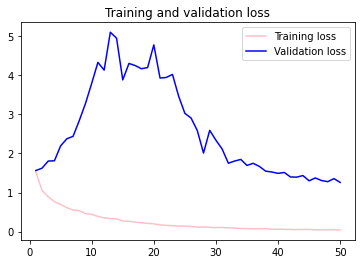

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'pink', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.legend()
    
plt.figure()

plt.plot(epochs, loss, 'pink', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()

Using load_model function to retrain model

In [11]:
new_model = tf.keras.models.load_model('flowers_classification.h5')

In [12]:
history = new_model.fit_generator(train_generator, epochs=50, verbose=1, callbacks=None,validation_data=valid_generator)

Epoch 1/50
12/12 [==============================] - 35s 3s/step - loss: 0.0380 - accuracy: 0.9967 - val_loss: 1.2866 - val_accuracy: 0.6533
Epoch 2/50
12/12 [==============================] - 33s 3s/step - loss: 0.0357 - accuracy: 0.9947 - val_loss: 1.2893 - val_accuracy: 0.6378
Epoch 3/50
12/12 [==============================] - 33s 3s/step - loss: 0.0288 - accuracy: 0.9977 - val_loss: 1.3337 - val_accuracy: 0.6332
Epoch 4/50
12/12 [==============================] - 33s 3s/step - loss: 0.0286 - accuracy: 0.9970 - val_loss: 1.3295 - val_accuracy: 0.6378
Epoch 5/50
12/12 [==============================] - 33s 3s/step - loss: 0.0304 - accuracy: 0.9957 - val_loss: 1.2504 - val_accuracy: 0.6741
Epoch 6/50
12/12 [==============================] - 33s 3s/step - loss: 0.0273 - accuracy: 0.9974 - val_loss: 1.2353 - val_accuracy: 0.6664
Epoch 7/50
12/12 [==============================] - 33s 3s/step - loss: 0.0302 - accuracy: 0.9964 - val_loss: 1.3063 - val_accuracy: 0.6633
Epoch 8/50
12/12 [==

In [ ]:
new_model.save('flowers_classification_retrain.h5')